# Model Training

### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [143]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import datetime as  datetime
import time
import warnings

Import the CSV Data as Pandas DataFrame

In [144]:
df=pd.read_csv('Data/raw.csv')

### 1.2 Show Top 5 Records

In [145]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### 1.3 Dataset information


- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-2= no credit to pay , -1=pay - - - duly , 0= minimum payment is met , 1=payment delay for one month , 2=payment delay for two months , … 8=payment delay for eight months , 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

### 1.4 Data Cleaning and Handling Features

In [146]:
df.drop('ID',axis=1,inplace=True)

In [147]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [149]:
df['EDUCATION'] = df['EDUCATION'].replace({0: df['EDUCATION'].mode()[0],5: df['EDUCATION'].mode()[0], 6: df['EDUCATION'].mode()[0]})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: df['MARRIAGE'].mode()[0]})



In [150]:
print(df.columns)
#- categorical Vars change -#
print(df['SEX'].value_counts())
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')
SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14375
1    10585
3     4917
4      123
Name: count, dtype: int64
MARRIAGE
2    16018
1    13659
3      323
Name: count, dtype: int64


In [151]:
df1=df.copy()

In [152]:
df1['SEX'] = df1['SEX'].replace(1,'Male')
df1['SEX'] = df1['SEX'].replace(2,'FeMale')
df1['EDUCATION'] = df1['EDUCATION'].replace(1,'Grad_School')
df1['EDUCATION'] = df1['EDUCATION'].replace(2,'University')
df1['EDUCATION'] = df1['EDUCATION'].replace(3,'High_School')
df1['EDUCATION'] = df1['EDUCATION'].replace(4,'Others')
df1['MARRIAGE'] = df1['MARRIAGE'].replace(1,'Married')
df1['MARRIAGE'] = df1['MARRIAGE'].replace(2,'Single')
df1['MARRIAGE'] = df1['MARRIAGE'].replace(3,'Others')

In [153]:
df1.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,FeMale,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,FeMale,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,FeMale,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,FeMale,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [154]:
Chan_col=('SEX','EDUCATION','MARRIAGE')
for i in Chan_col:
    print(df1[i].value_counts())

SEX
FeMale    18112
Male      11888
Name: count, dtype: int64
EDUCATION
University     14375
Grad_School    10585
High_School     4917
Others           123
Name: count, dtype: int64
MARRIAGE
Single     16018
Married    13659
Others       323
Name: count, dtype: int64


In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

#### 1.5 Encoding categorical variables

In [156]:
df_encoded = pd.get_dummies(df1, 
                            columns=['SEX', 'EDUCATION', 'MARRIAGE'], 
                            prefix=['Sex', 'Edu', 'Mar'])
df_encoded = df_encoded.astype(int)
df_encoded.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default_payment_next_month,Sex_FeMale,Sex_Male,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,1,0,0,0,0,1,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,1,0,0,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,1,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,1,0,0,0,1,1,0,0


In [157]:
df_encoded = df_encoded[['Sex_Male', 'Sex_FeMale', 
                     'Edu_Grad_School','Edu_High_School','Edu_Others','Edu_University',
                     'Mar_Married',	'Mar_Others',	'Mar_Single',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_1',
                     'PAY_2',
                     'PAY_3',
                     'PAY_4',
                     'PAY_5',
                     'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                     'default_payment_next_month']]

df_model = df_encoded.copy()
df_model.head()

,Sex_Male,Sex_FeMale,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,1,0,0,0,1,1,0,0,24,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,26,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,0,1,0,0,1,34,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,0,0,1,1,0,0,37,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,0,0,1,1,0,0,57,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 2. Preparing X and Y variables

In [158]:
X = df_model.drop(columns=['default_payment_next_month'],axis=1)

In [159]:
X.head()

,Sex_Male,Sex_FeMale,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single,AGE,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,0,1,1,0,0,24,...,689,0,0,0,0,689,0,0,0,0
1,0,1,0,0,0,1,0,0,1,26,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,1,0,0,0,1,0,0,1,34,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,1,0,0,0,1,1,0,0,37,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,0,0,0,0,1,1,0,0,57,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [160]:
y = df_model['default_payment_next_month']

In [161]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 30000, dtype: int32

In [162]:
##Train Test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((21000, 29), (9000, 29))

In [163]:
X_train

,Sex_Male,Sex_FeMale,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single,AGE,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,0,1,1,0,0,0,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
27622,0,1,1,0,0,0,0,0,1,23,...,2299,4800,9810,660,2548,2321,4800,9810,660,2980
28376,0,1,0,0,0,1,1,0,0,36,...,49125,47956,43578,35126,0,4700,0,2004,3500,0
10917,0,1,0,1,0,0,1,0,0,54,...,104686,102549,101400,0,0,0,0,0,0,0
27234,1,0,1,0,0,0,1,0,0,35,...,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,1,0,0,0,0,1,0,0,1,32,...,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5390,1,0,1,0,0,0,0,0,1,37,...,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
860,1,0,1,0,0,0,0,0,1,26,...,0,0,0,0,0,0,0,0,0,0
15795,0,1,0,0,0,1,0,0,1,25,...,51152,35122,28633,28039,3000,2000,4500,1200,0,1200


In [164]:
X_test

,Sex_Male,Sex_FeMale,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single,AGE,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,1,0,0,0,0,1,0,0,1,25,...,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
22404,0,1,1,0,0,0,0,0,1,26,...,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
23397,0,1,0,1,0,0,1,0,0,32,...,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
25058,1,0,0,1,0,0,0,0,1,49,...,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
2664,0,1,0,0,0,1,0,0,1,36,...,42361,19574,20295,19439,2000,1500,1000,1800,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,0,1,1,0,0,0,0,0,1,34,...,0,0,0,666,13621,0,0,0,666,0
17854,1,0,1,0,0,0,0,0,1,27,...,45622,47232,47583,53032,8000,5000,4000,3000,8000,3000
95,1,0,0,0,0,1,0,0,1,35,...,87653,35565,30942,30835,3621,3597,1179,1112,1104,1143
6279,0,1,0,0,0,1,1,0,0,36,...,142295,145127,148159,151462,5100,5163,5196,5372,5761,5396


In [165]:

## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [166]:
X_train=scaler.fit_transform(X_train)

In [167]:
X_test=scaler.transform(X_test)

In [168]:
X_train

array([[-0.80648893,  0.80648893,  1.35101399, ..., -0.30370385,
        -0.30669703, -0.29550752],
       [-0.80648893,  0.80648893,  1.35101399, ...,  0.3050678 ,
        -0.26502896, -0.12727157],
       [-0.80648893,  0.80648893, -0.74018479, ..., -0.17934316,
        -0.08573001, -0.29550752],
       ...,
       [ 1.23994262, -1.23994262,  1.35101399, ..., -0.30370385,
        -0.30669703, -0.29550752],
       [-0.80648893,  0.80648893, -0.74018479, ..., -0.22923637,
        -0.30669703, -0.2277615 ],
       [-0.80648893,  0.80648893, -0.74018479, ..., -0.20131106,
         0.58979774, -0.210825  ]])

In [169]:
X_test

array([[ 1.23994262, -1.23994262, -0.74018479, ..., -0.2106195 ,
        -0.21199688, -0.18259749],
       [-0.80648893,  0.80648893,  1.35101399, ..., -0.139441  ,
        -0.13819389, -0.14482908],
       [-0.80648893,  0.80648893, -0.74018479, ..., -0.15241075,
        -0.14886344, -0.15132141],
       ...,
       [ 1.23994262, -1.23994262, -0.74018479, ..., -0.23469732,
        -0.23699772, -0.23097944],
       [-0.80648893,  0.80648893, -0.74018479, ...,  0.02966224,
         0.05701469,  0.00912376],
       [-0.80648893,  0.80648893,  1.35101399, ..., -0.03617943,
        -0.25518015,  0.22190272]])

### 3. Create an Evaluate Function to give all metrics after model Training

In [170]:
models = {
    "SVM": SVC(probability=True),  # Ensure SVM outputs probabilities for ROC-AUC
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss"), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}


def model_prediction(name, model):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision=precision_score(y_test, y_pred)
        recall=recall_score(y_test,y_pred)
        f1_Score = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model name : {name}")
        print("="*50)
        cm = confusion_matrix(y_test, y_pred)

        # Create a DataFrame with appropriate labels
        cdf = pd.DataFrame(
            cm,
            index=["Actual 0", "Actual 1"],   # Rows labeled as actual classes
            columns=["Predicted 0", "Predicted 1"]  # Columns labeled as predicted classes
        )

        # Display the confusion matrix DataFrame
        print(cdf)
        print("="*50)
        print(f"Accuracy is: {accuracy:.2f}")
        print(f"Precision is: {precision:.2f}")
        print(f"Recall is: {recall:.2f}")
        print(f"F1score is: {f1_Score:.2f}")
        print(f"AUC is: {auc:.2f}\n")
        #print("\nClassification Report (Test):")
        #print(classification_report(y_test, y_pred))

for name, model in models.items():
    model_prediction(name, model)

Model name : SVM
          Predicted 0  Predicted 1
Actual 0         6728          312
Actual 1         1324          636
Accuracy is: 0.82
Precision is: 0.67
Recall is: 0.32
F1score is: 0.44
AUC is: 0.64

Model name : Decision Tree Classifier
          Predicted 0  Predicted 1
Actual 0         5740         1300
Actual 1         1164          796
Accuracy is: 0.73
Precision is: 0.38
Recall is: 0.41
F1score is: 0.39
AUC is: 0.61

Model name : Random Forest Classifier
          Predicted 0  Predicted 1
Actual 0         6627          413
Actual 1         1252          708
Accuracy is: 0.81
Precision is: 0.63
Recall is: 0.36
F1score is: 0.46
AUC is: 0.65



d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model name : XGBClassifier
          Predicted 0  Predicted 1
Actual 0         6570          470
Actual 1         1242          718
Accuracy is: 0.81
Precision is: 0.60
Recall is: 0.37
F1score is: 0.46
AUC is: 0.65

Model name : CatBoost Classifier
          Predicted 0  Predicted 1
Actual 0         6650          390
Actual 1         1255          705
Accuracy is: 0.82
Precision is: 0.64
Recall is: 0.36
F1score is: 0.46
AUC is: 0.65



d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model name : AdaBoost Classifier
          Predicted 0  Predicted 1
Actual 0         6745          295
Actual 1         1359          601
Accuracy is: 0.82
Precision is: 0.67
Recall is: 0.31
F1score is: 0.42
AUC is: 0.63



In [171]:
df_model.head()

,Sex_Male,Sex_FeMale,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,1,0,0,0,1,1,0,0,24,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,26,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,0,1,0,0,1,34,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,0,0,1,1,0,0,37,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,0,0,1,1,0,0,57,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


C:\Users\sanss\AppData\Local\Temp\ipykernel_16692\532720248.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=counts, x='default_payment_next_month', y='percentage', ci=None, palette="viridis")
C:\Users\sanss\AppData\Local\Temp\ipykernel_16692\532720248.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='default_payment_next_month', y='percentage', ci=None, palette="viridis")


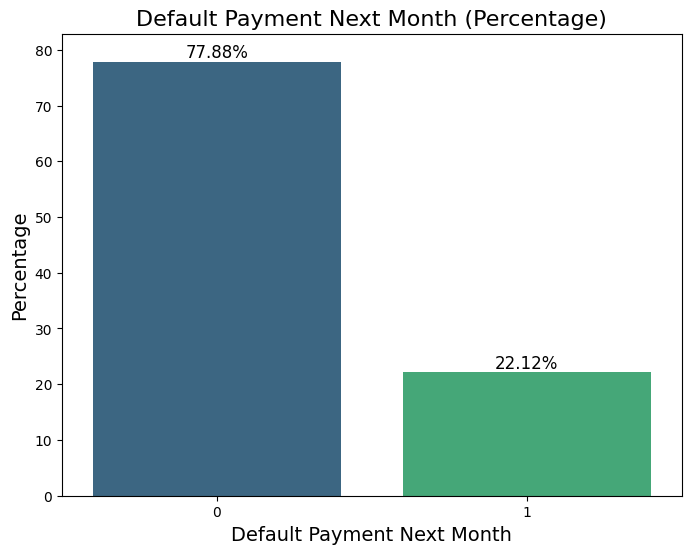

In [172]:
counts = df_model['default_payment_next_month'].value_counts().reset_index()
counts.columns = ['default_payment_next_month', 'count']
counts['percentage'] = (counts['count'] / counts['count'].sum()) * 100

# Step 2: Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=counts, x='default_payment_next_month', y='percentage', ci=None, palette="viridis")

# Step 3: Annotate the bars with percentages
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge', fontsize=12)

# Step 4: Customize the plot
plt.title("Default Payment Next Month (Percentage)", fontsize=16)
plt.xlabel("Default Payment Next Month", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.ylim(0, counts['percentage'].max() + 5)  # Adjust ylim for better visibility
plt.show()


#### Data is imbalance

### 3.Handle the imbalance data

In [173]:
smote = SMOTE()
     
df_smote=df.copy()
# Separate independent and dependent variables
X1 = df_smote.iloc[:,:-1]
y1 = df_smote['default_payment_next_month']
     

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X1, y1)

In [174]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default_payment_next_month'] = y_smote

df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\sanss\AppData\Local\Temp\ipykernel_16692\1574810652.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=counts, x='default_payment_next_month', y='percentage', ci=None, palette="viridis")
C:\Users\sanss\AppData\Local\Temp\ipykernel_16692\1574810652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=counts, x='default_payment_next_month', y='percentage', ci=None, palette="viridis")


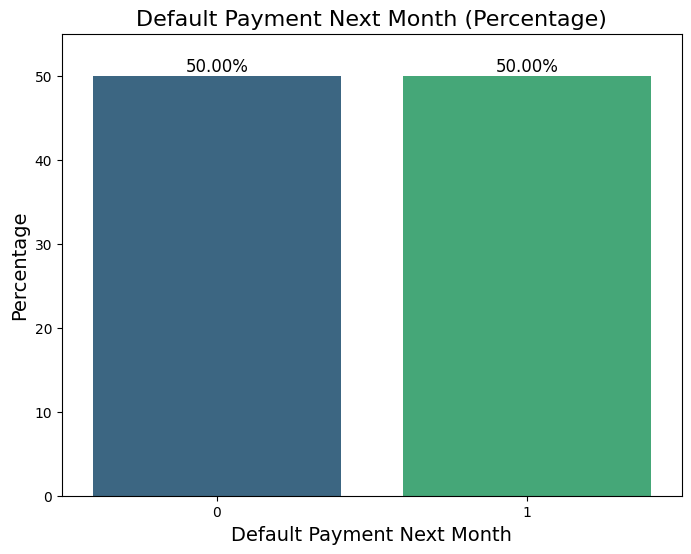

In [175]:
counts = df_final['default_payment_next_month'].value_counts().reset_index()
counts.columns = ['default_payment_next_month', 'count']
counts['percentage'] = (counts['count'] / counts['count'].sum()) * 100

# Step 2: Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=counts, x='default_payment_next_month', y='percentage', ci=None, palette="viridis")

# Step 3: Annotate the bars with percentages
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge', fontsize=12)

# Step 4: Customize the plot
plt.title("Default Payment Next Month (Percentage)", fontsize=16)
plt.xlabel("Default Payment Next Month", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.ylim(0, counts['percentage'].max() + 5)  # Adjust ylim for better visibility
plt.show()


In [176]:
df_final['default_payment_next_month'].value_counts()

default_payment_next_month
1    23364
0    23364
Name: count, dtype: int64

In [177]:
df_final.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [178]:
df_final['SEX'] = df_final['SEX'].replace({1:'Male',2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Grad_School',2:'University',3:'High_School',4:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others'})
df_final_encoded = pd.get_dummies(df1, 
                            columns=['SEX', 'EDUCATION', 'MARRIAGE'], 
                            prefix=['Sex', 'Edu', 'Mar'])
df_final_encoded = df_final_encoded.astype(int)
df_final_encoded = df_final_encoded[['Sex_Male', 'Sex_FeMale', 
                     'Edu_Grad_School','Edu_High_School','Edu_Others','Edu_University',
                     'Mar_Married',	'Mar_Others',	'Mar_Single',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_1',
                     'PAY_2',
                     'PAY_3',
                     'PAY_4',
                     'PAY_5',
                     'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                     'default_payment_next_month']]

df_model2 = df_final_encoded.copy()
df_model2.head()

,Sex_Male,Sex_FeMale,Edu_Grad_School,Edu_High_School,Edu_Others,Edu_University,Mar_Married,Mar_Others,Mar_Single,AGE,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,1,0,0,0,1,1,0,0,24,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,26,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,0,0,1,0,0,1,34,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,0,0,1,1,0,0,37,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,0,0,1,1,0,0,57,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [179]:
X_sm = df_model2.drop(columns=['default_payment_next_month'],axis=1)
y_sm = df_model2['default_payment_next_month']

X_sm_train,X_sm_test,y_sm_train,y_sm_test=train_test_split(X_sm,y_sm,test_size=0.3,random_state=42)
X_sm_train.shape, X_sm_test.shape

((21000, 29), (9000, 29))

In [180]:
scaler=StandardScaler()

X_sm_train=scaler.fit_transform(X_sm_train)
X_sm_test=scaler.transform(X_sm_test)

print(X_sm_train)
print(X_sm_test)

[[-0.80648893  0.80648893  1.35101399 ... -0.30370385 -0.30669703
  -0.29550752]
 [-0.80648893  0.80648893  1.35101399 ...  0.3050678  -0.26502896
  -0.12727157]
 [-0.80648893  0.80648893 -0.74018479 ... -0.17934316 -0.08573001
  -0.29550752]
 ...
 [ 1.23994262 -1.23994262  1.35101399 ... -0.30370385 -0.30669703
  -0.29550752]
 [-0.80648893  0.80648893 -0.74018479 ... -0.22923637 -0.30669703
  -0.2277615 ]
 [-0.80648893  0.80648893 -0.74018479 ... -0.20131106  0.58979774
  -0.210825  ]]
[[ 1.23994262 -1.23994262 -0.74018479 ... -0.2106195  -0.21199688
  -0.18259749]
 [-0.80648893  0.80648893  1.35101399 ... -0.139441   -0.13819389
  -0.14482908]
 [-0.80648893  0.80648893 -0.74018479 ... -0.15241075 -0.14886344
  -0.15132141]
 ...
 [ 1.23994262 -1.23994262 -0.74018479 ... -0.23469732 -0.23699772
  -0.23097944]
 [-0.80648893  0.80648893 -0.74018479 ...  0.02966224  0.05701469
   0.00912376]
 [-0.80648893  0.80648893  1.35101399 ... -0.03617943 -0.25518015
   0.22190272]]


In [181]:
models = {
    "SVM": SVC(probability=True),  # Ensure SVM outputs probabilities for ROC-AUC
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss"), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}


def model_prediction(name, model):
        model.fit(X_sm_train, y_sm_train)
        y_sm_pred = model.predict(X_sm_test)
        precision=precision_score(y_sm_test, y_sm_pred)
        recall=recall_score(y_sm_test,y_sm_pred)
        f1_Score = f1_score(y_sm_test, y_sm_pred)
        auc = roc_auc_score(y_sm_test, y_sm_pred)
        accuracy = accuracy_score(y_sm_test, y_sm_pred)
        print(f"Model name : {name}")
        print("="*50)
        cm = confusion_matrix(y_sm_test, y_sm_pred)

        # Create a DataFrame with appropriate labels
        cdf = pd.DataFrame(
            cm,
            index=["Actual 0", "Actual 1"],   # Rows labeled as actual classes
            columns=["Predicted 0", "Predicted 1"]  # Columns labeled as predicted classes
        )

        # Display the confusion matrix DataFrame
        print(cdf)
        print("="*50)
        #[print(f"Accuracy is: {accuracy:.2f}")
        # print(f"Precision is: {precision:.2f}")
        # print(f"Recall is: {recall:.2f}")
        # print(f"F1score is: {f1_Score:.2f}")
        # print(f"AUC is: {auc:.2f}\n")
        print("\nClassification Report (Test):")
        print(classification_report(y_sm_test, y_sm_pred))

for name, model in models.items():
    model_prediction(name, model)

Model name : SVM
          Predicted 0  Predicted 1
Actual 0         6728          312
Actual 1         1324          636

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.67      0.32      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

Model name : Decision Tree Classifier
          Predicted 0  Predicted 1
Actual 0         5734         1306
Actual 1         1166          794

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.38      0.41      0.39      1960

    accuracy                           0.73      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000

Model name : Random

d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model name : XGBClassifier
          Predicted 0  Predicted 1
Actual 0         6570          470
Actual 1         1242          718

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7040
           1       0.60      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Model name : CatBoost Classifier
          Predicted 0  Predicted 1
Actual 0         6650          390
Actual 1         1255          705

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.64      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model name : AdaBoost Classifier
          Predicted 0  Predicted 1
Actual 0         6745          295
Actual 1         1359          601

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.67      0.31      0.42      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.63      0.66      9000
weighted avg       0.80      0.82      0.79      9000



In [185]:
X_sm = scaler.fit_transform(X_sm)
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_sm_train,y_sm_train)
train_class_preds = rf_clf.predict(X_sm_train)
test_class_preds = rf_clf.predict(X_sm_test)
train_accuracy_score_rf=accuracy_score(train_class_preds,y_sm_train)
test_accuracy_score_rf=accuracy_score(test_class_preds,y_sm_test)
train_recall_score_rf = recall_score(train_class_preds,y_sm_train)
test_recall_score_rf = recall_score(test_class_preds,y_sm_test)
train_f1_score_rf = f1_score(train_class_preds,y_sm_train)
test_f1_score_rf = f1_score(test_class_preds,y_sm_test)
print('train accuracy',train_accuracy_score_rf)
print('test accuracy',test_accuracy_score_rf)
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print('train_f1_score', train_f1_score_rf)
print('test_f1_score', test_f1_score_rf)

train accuracy 0.9994285714285714
test accuracy 0.8147777777777778
The recall on train data is  0.9993576017130621
The recall on test data is  0.6272806255430061
train_f1_score 0.9987160282473786
test_f1_score 0.4641594342655095


### 4. Results 

In this case we will consider recall for evaluating the credit card prediction model as under recall we evaluate out of all the predicted values how many are correctly predicted

As Random Forest & XGBoost are having same recall ,so we can consider any 1 of them.So will we considering Random Forest for Model Prediction

In [ ]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8154444444444444

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2308,0,0,0
22404,0,0,0
23397,0,0,0
25058,0,0,0
2664,1,0,1
...,...,...,...
3941,1,0,1
17854,0,0,0
95,0,0,0
6279,0,0,0


In [ ]:
params = {'max_depth' : [1, 2, 3,4, 10, 20, 30],
         'n_estimators': [50, 100, 200, 300, 400, 1000],
         'criterion': ["gini", 'entropy']}

In [ ]:
clf = GridSearchCV(rf, param_grid=params, cv = 5, scoring = "accuracy", verbose=3)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.782 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.780 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.777 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.793 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=50;, score=0.781 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.785 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.784 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.794 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.782 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.785 total time=   0.5s
[CV 1/5] END criterion=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 300, 400, 1000]},
             scoring='accuracy', verbose=3)

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [ ]:
clf.best_score_

0.8196190476190477

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame with appropriate labels
cdf = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],   # Rows labeled as actual classes
    columns=["Predicted 0", "Predicted 1"]  # Columns labeled as predicted classes
)

# Display the confusion matrix DataFrame
print(cdf)

          Predicted 0  Predicted 1
Actual 0         6626          414
Actual 1         1247          713


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2308,0,0,0
22404,0,0,0
23397,0,0,0
25058,0,0,0
2664,1,0,1
...,...,...,...
3941,1,0,1
17854,0,0,0
95,0,0,0
6279,0,0,0
